In [1]:
import tensorflow as tf
import pandas as pd
import numpy as np
from keras.layers import BatchNormalization

Import Data

In [35]:
loan = pd.read_csv('loan_data.csv')
input = pd.read_csv('input.csv')
output = pd.read_csv('output.csv')


In [36]:
loan_df = pd.DataFrame(loan)
input = pd.DataFrame(input)
output = pd.DataFrame(output)

In [37]:
loan_df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [38]:
data = loan_df.drop('purpose',axis=1)
data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [39]:
X=data.drop('not.fully.paid',axis=1)
y=data['not.fully.paid']

In [40]:
X.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0


In [41]:
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
gb = GradientBoostingClassifier()
rf = RandomForestClassifier()
rf.fit(X,y)
gb.fit(X,y)
print(gb.feature_importances_)
print(rf.feature_importances_)

[0.1533718  0.17081544 0.11748454 0.10886237 0.0420134  0.05761203
 0.07455672 0.08005616 0.07134178 0.10097652 0.00445317 0.01845607]
[0.01434085 0.10967789 0.12394697 0.11807995 0.11576358 0.07982868
 0.12015912 0.12185675 0.11884479 0.05293941 0.01479979 0.00976223]


<AxesSubplot:>

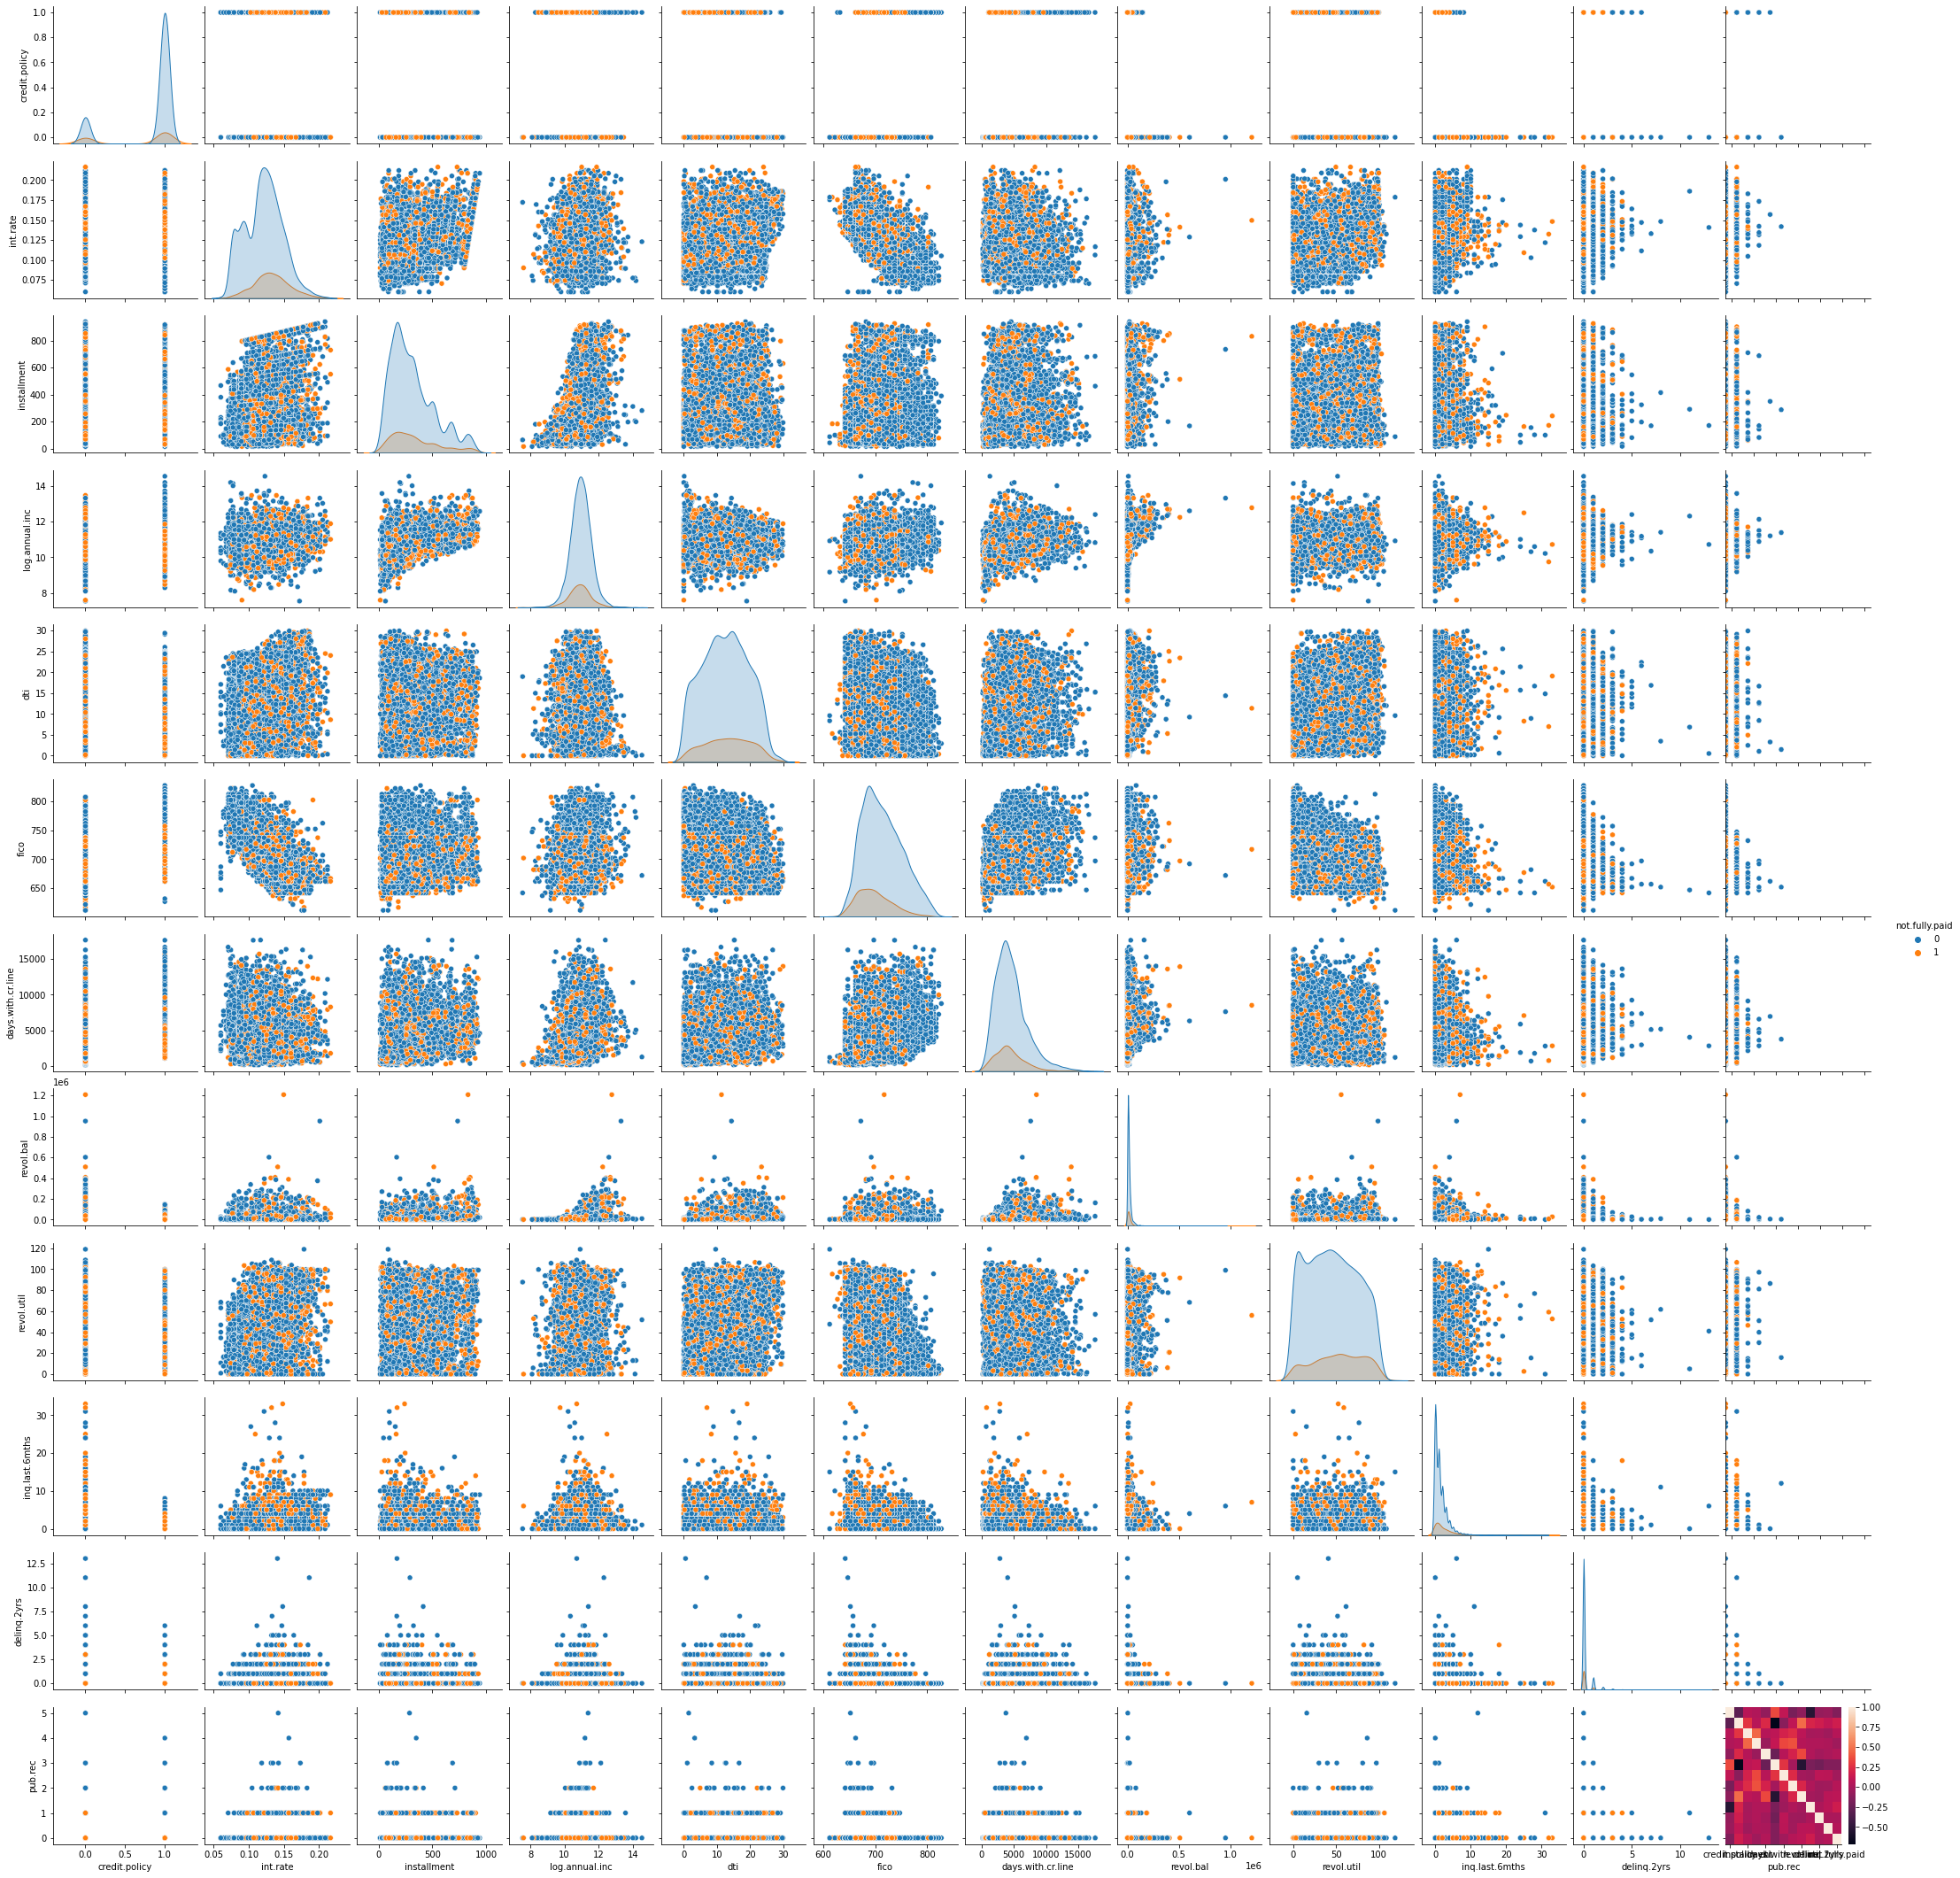

In [42]:
from matplotlib import pyplot as plt
import seaborn as sns
sns.pairplot(data,diag_kind='kde',hue="not.fully.paid")
sns.heatmap(data.corr())

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,random_state=1)

In [44]:
#Initialize Sequential model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Reshape((12,),input_shape=(12,)))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())

In [45]:
#Add 0th hidden layer
model.add(tf.keras.layers.Dense(400, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LeakyReLU())

In [46]:
#Add 1st hidden layer
model.add(tf.keras.layers.Dense(200, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LeakyReLU())

In [47]:
#Add 2nd hidden layer
model.add(tf.keras.layers.Dense(100, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LeakyReLU())

In [48]:
#Add 3rd hidden layer
model.add(tf.keras.layers.Dense(60, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LeakyReLU())

In [49]:
#Add 4th hidden layer
model.add(tf.keras.layers.Dense(30, activation='relu'))
model.add(tf.keras.layers.BatchNormalization())
model.add(tf.keras.layers.LeakyReLU())

In [50]:
#Add OUTPUT layer
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

In [51]:
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.01)

#Compile the model
model.compile(optimizer=sgd_optimizer, loss='binary_crossentropy', metrics=['accuracy'])

/opt/anaconda3/lib/python3.8/site-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


In [52]:
model.fit(X_train,y_train,          
          validation_data=(X_test,y_test),
          epochs=50,
          batch_size=32)

Epoch 1/50
240/240 [==============================] - 3s 5ms/step - loss: 0.5587 - accuracy: 0.7383 - val_loss: 0.5308 - val_accuracy: 0.8319
Epoch 2/50
240/240 [==============================] - 1s 4ms/step - loss: 0.4440 - accuracy: 0.8328 - val_loss: 0.4749 - val_accuracy: 0.8309
Epoch 3/50
240/240 [==============================] - 1s 4ms/step - loss: 0.4281 - accuracy: 0.8391 - val_loss: 0.4625 - val_accuracy: 0.8278
Epoch 4/50
240/240 [==============================] - 1s 3ms/step - loss: 0.4148 - accuracy: 0.8409 - val_loss: 0.4586 - val_accuracy: 0.8293
Epoch 5/50
240/240 [==============================] - 1s 3ms/step - loss: 0.4069 - accuracy: 0.8431 - val_loss: 0.4547 - val_accuracy: 0.8288
Epoch 6/50
240/240 [==============================] - 1s 3ms/step - loss: 0.4068 - accuracy: 0.8414 - val_loss: 0.4554 - val_accuracy: 0.8293
Epoch 7/50
240/240 [==============================] - 1s 3ms/step - loss: 0.4049 - accuracy: 0.8433 - val_loss: 0.4553 - val_accuracy: 0.8278
Epoch 

In [53]:
print('Evaluation on Test Data')
results = model.evaluate(X_test, y_test, batch_size=32)

Evaluation on Test Data
60/60 [==============================] - 0s 2ms/step - loss: 0.4997 - accuracy: 0.8178


In [93]:
preds = model.predict(X_test)
evals = y_test.to_frame()
evals['Predictions'] = preds.tolist()


60/60 [==============================] - 0s 2ms/step


In [94]:
evals

,not.fully.paid,Predictions
8261,0,[0.03971779718995094]
3431,1,[0.4970680773258209]
5482,1,[0.33308589458465576]
3272,1,[0.16792535781860352]
4687,0,[0.1100819781422615]
...,...,...
6508,0,[0.10057209432125092]
9432,0,[0.2931601405143738]
8981,0,[0.006073592230677605]
8612,1,[0.36512109637260437]
